# Data Loading

In [1]:
from src import dataset,visualization,model_training
from torch.utils.data import DataLoader
from IPython.display import display
from src.model import  FashionMinstModel

In [2]:
train_data=dataset.FashionDataset("../dataset/fashion-mnist_train.csv",normalized=True)
test_data=dataset.FashionDataset("../dataset/fashion-mnist_test.csv",normalized=True)

sample_data=dataset.FashionDataset("../dataset/fashion-mnist_test.csv",normalized=False,n_rows=5)

train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
test_loader=DataLoader(test_data,batch_size=64)

# Data Exploration

In [3]:
print(f"train data size={len(train_data)}")
print(f"test data size={len(test_data)}")

train data size=60000
test data size=10000


In [4]:
for item,data in dataset.FashionDataset.meta_data.items():
    print(item,':',data)

img_vector_size : 784
img_dim : (28, 28)
classes : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


class index: tensor(0) class Name: T-shirt/top


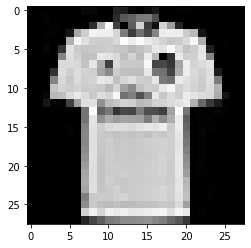

class index: tensor(1) class Name: Trouser


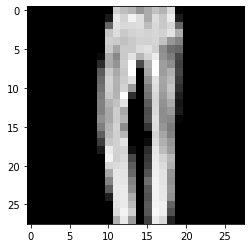

class index: tensor(2) class Name: Pullover


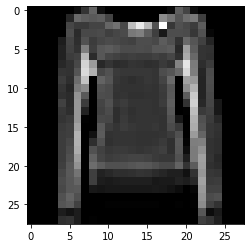

class index: tensor(2) class Name: Pullover


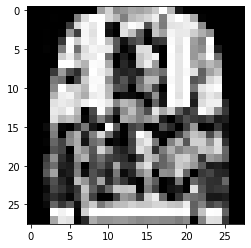

class index: tensor(3) class Name: Dress


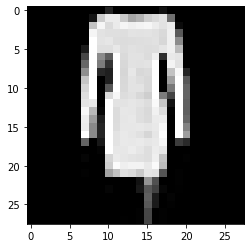

In [5]:
for img_vector,label in sample_data:
    print("class index:",label,"class Name:",dataset.FashionDataset.meta_data["classes"][label])
    visualization.show_vector_img(img_vector,(28,28))

In [8]:
fashion_minset_model=FashionMinstModel()


In [11]:
model_training.train(fashion_minset_model,epochs=30,learning_rate=0.01,train_loader=train_loader,test_loader=test_loader)


KeyboardInterrupt: 